Lambda School Data Science

*Unit 4, Sprint 1, Module 4*

---

# Topic Modeling (Prepare)

# Latent Dirchilet Allocation (LDA) Models (Prepare)
<a id="#p1"></a>

## Overview
LDA is a "generative probabilistic model". 

Let's play with a modoel available [here](https://lettier.com/projects/lda-topic-modeling/)

## Follow Along

## Challenge 

# Estimating LDA Models with Gensim (Learn)
<a id="#p1"></a>

## Overview
### A Litterary Introduction: *Jane Austen V. Charlotte Bronte*
Despite being born nearly forty years apart, modern fans often pit Jane Austen & Charlotte Bronte against one another in a battle for litterary  supremacy. The battle centers around the topics of education for women, courting, and marriage. The authors' similiar backgrounds naturally draw comparisons, but the modern fascination is probably due to novelility of British women publishing novels during the early 19th century. 

Can we help close a litterary battle for supremacy and simply acknowledge that the authors addressed different topics and deserve to be acknowledged as excellent authors each in their own right?

We're going to apply Latent Dirichlet Allocation a machine learning alogrithm for topic modeling to each of the author's novels to compare the distribution of topics in their novels.

In [2]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

### Novel Data
I grabbed the novel data pre-split into a bunch of smaller chuncks

In [7]:
path = './module4-topic-modeling/data/austen-brontë-split'

In [8]:
def tokenize(text):
    
    return [token for token in simple_preprocess(text) if token in STOPWORDS]

In [9]:
import os

def gather_data(path_to_data): 
    data = []
    
    for f in os.listdir(path):
        if os.path.isdir(f) == False:
            if f[-3:] == 'txt':
                with open(os.path.join(path,f)) as t:
                    text = t.read().strip('\n')
                    data.append(tokenize(str(text)))
            
    return data

In [10]:
tokens = gather_data(path)

In [11]:
tokens[0][0:10]

['by', 'and', 'with', 'and', 'seemed', 'to', 'some', 'of', 'the', 'of']

In [12]:
"this is a sample string with a \n newline character".replace('\n', '')

'this is a sample string with a  newline character'

## Follow Along

### Text Preprocessing
**Challenge**: update the function `tokenize` with any technique you have learned so far this week. 

In [13]:
titles = [t[:-4] for t in os.listdir(path) if os.path.isdir(t) == False]

In [14]:
len(titles)

813

In [15]:
titles[:5]

['Austen_Emma0000',
 'Austen_Emma0001',
 'Austen_Emma0002',
 'Austen_Emma0003',
 'Austen_Emma0004']

In [16]:
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [17]:
tokenize("Hello World! This a test of the tokenization method")

['hello', 'world', 'test', 'tokenization', 'method']

In [18]:
len(tokens)

813

### Author DataFrame


In [19]:
df = pd.DataFrame(index=titles, data={'tokens':tokens})

In [20]:
df.head()

,tokens
Austen_Emma0000,"[by, and, with, and, seemed, to, some, of, the..."
Austen_Emma0001,"[she, were, here, again, what, it, is, that, e..."
Austen_Emma0002,"[all, every, was, every, in, their, not, and, ..."
Austen_Emma0003,"[of, and, of, which, for, the, last, two, or, ..."
Austen_Emma0004,"[some, of, the, had, you, have, of, the, has, ..."


In [21]:
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()
df['book'] = df.reset_index()['index'].apply(lambda x: x.split('_')[1][:-4]).tolist()
df['section'] = df.reset_index()['index'].apply(lambda x: x[-4:]).tolist()
df['section'] = df['section'].astype('int')

In [22]:
df['author'] = df['author'].map({'Austen':1, 'CBronte':0})

In [23]:
df.author.value_counts()

0    441
1    372
Name: author, dtype: int64

### Streaming Documents
Here we use a new pythonic thingy: the `yield` statement in our fucntion. This allows us to iterate over a bunch of documents without actually reading them into memory. You can see how we use this fucntion later on. 

In [24]:
def doc_stream(path):
    for f in os.listdir(path):
        if os.path.isdir(f) == False:
            if f[-3:] == 'txt':
                with open(os.path.join(path,f)) as t:
                    text = t.read().strip('\n')
                    tokens = tokenize(str(text))
                    yield tokens

In [25]:
streaming_data = doc_stream(path)

In [26]:
# gather_data => returns a list
# when concerened about resources on machine, use more 'pythonic' yield
# doc_stream => reutrns a generator

In [27]:
streaming_data

<generator object doc_stream at 0x000001DB314466D8>

In [28]:
next(streaming_data) # Returns one document at a time from the generator 

['emma',
 'jane',
 'austen',
 'volume',
 'chapter',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'unite',
 'best',
 'blessings',
 'existence',
 'lived',
 'nearly',
 'years',
 'world',
 'little',
 'distress',
 'vex',
 'youngest',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period',
 'mother',
 'died',
 'long',
 'ago',
 'indistinct',
 'remembrance',
 'caresses',
 'place',
 'supplied',
 'excellent',
 'woman',
 'governess',
 'fallen',
 'little',
 'short',
 'mother',
 'affection',
 'sixteen',
 'years',
 'miss',
 'taylor',
 'woodhouse',
 'family',
 'governess',
 'friend',
 'fond',
 'daughters',
 'particularly',
 'emma',
 'intimacy',
 'sisters',
 'miss',
 'taylor',
 'ceased',
 'hold',
 'nominal',
 'office',
 'governess',
 'mildness',
 'temper',
 'hardly',
 'allowed',
 'impose',
 'restraint',
 'shadow',
 'authority',
 'long',
 'passed',
 'away',


### Gensim LDA Topic Modeling

In [29]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(doc_stream(path))

In [30]:
id2word.token2id['jane']

156

In [33]:
id2word[2754]

'message'

In [34]:
id2word.doc2bow(tokenize("This is a sample message Darcy England England England"))

[(2754, 1), (3987, 3), (6602, 1), (6819, 1)]

In [35]:
import sys
sys.getsizeof(id2word)

56

In [36]:
len(id2word.keys())

22096

In [37]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

In [38]:
len(id2word.keys())

8103

In [39]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [id2word.doc2bow(text) for text in doc_stream(path)]

In [40]:
corpus[0][:10]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 4),
 (7, 1),
 (8, 1),
 (9, 1)]

In [41]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state= 42,
                   num_topics = 15,
                   passes=10,
                   workers=8
                  )

In [42]:
lda.print_topics()

[(0,
  '0.008*"frances" + 0.007*"lucy" + 0.006*"felt" + 0.005*"elinor" + 0.005*"edward" + 0.004*"mother" + 0.004*"heart" + 0.004*"little" + 0.004*"john" + 0.003*"monsieur"'),
 (1,
  '0.006*"like" + 0.005*"little" + 0.004*"rochester" + 0.004*"thought" + 0.004*"room" + 0.004*"night" + 0.004*"long" + 0.004*"door" + 0.004*"day" + 0.003*"looked"'),
 (2,
  '0.007*"helen" + 0.006*"brocklehurst" + 0.006*"temple" + 0.005*"thought" + 0.005*"little" + 0.005*"miss" + 0.005*"know" + 0.005*"time" + 0.004*"good" + 0.003*"like"'),
 (3,
  '0.022*"emma" + 0.015*"harriet" + 0.011*"weston" + 0.011*"knightley" + 0.010*"miss" + 0.009*"elton" + 0.008*"thing" + 0.008*"think" + 0.008*"good" + 0.008*"little"'),
 (4,
  '0.010*"marianne" + 0.006*"house" + 0.006*"elinor" + 0.005*"little" + 0.005*"know" + 0.004*"lady" + 0.004*"edward" + 0.004*"like" + 0.003*"day" + 0.003*"saw"'),
 (5,
  '0.009*"little" + 0.006*"madame" + 0.006*"like" + 0.005*"know" + 0.004*"good" + 0.004*"thought" + 0.004*"bretton" + 0.004*"monsieu

In [43]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [44]:
topics = [' '.join(t[0:5]) for t in words]

In [45]:
for id, t in enumerate(topics): 
    print(f'------Topic {id}------')
    print(t, end='\n\n')

------Topic 0------
frances lucy felt elinor edward

------Topic 1------
like little rochester thought room

------Topic 2------
helen brocklehurst temple thought little

------Topic 3------
emma harriet weston knightley miss

------Topic 4------
marianne house elinor little know

------Topic 5------
little madame like know good

------Topic 6------
hunsden like little good time

------Topic 7------
jane miss know shall think

------Topic 8------
miss jane emma woodhouse elton

------Topic 9------
monsieur know good little time

------Topic 10------
room know little time good

------Topic 11------
miss helen temple heart eyes

------Topic 12------
bingley miss elizabeth bennet jane

------Topic 13------
elizabeth darcy bennet jane miss

------Topic 14------
elinor marianne sister mother time



## Challenge 

You will apply an LDA model to a customer review dataset to practice the fitting and estimation of LDA. 

# Interpret LDA Results (Learn)
<a id="#p3"></a>

## Overview

## Follow Along

### Topic Distance Visualization

In [40]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [41]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\Nick\Anaconda3\envs\U4-S1-NLP\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.094743  0.051087       1        1  25.342945
5     -0.059912  0.045971       2        1  16.260868
14     0.089654 -0.027866       3        1  13.679091
13     0.110790 -0.000419       4        1  10.834249
3      0.144375  0.004045       5        1  10.558668
7      0.051947  0.015345       6        1   7.904091
6     -0.089900  0.074734       7        1   5.681826
12     0.103713  0.002691       8        1   2.286993
8      0.093634 -0.002102       9        1   2.217187
4      0.008906 -0.008222      10        1   2.048748
2     -0.064982  0.074184      11        1   1.437739
9     -0.061212  0.055725      12        1   0.976883
10    -0.042155 -0.061320      13        1   0.314308
0     -0.088646 -0.124747      14        1   0.246258
11    -0.101468 -0.099106      15        1   0.210145, topic_info=     Category         Freq          Term        Total  loglift  logprob
183   Default  1514.000000          miss  1514.000000  30.0000  30.0000
86    Default   882.000000          emma   882.000000  29.0000  29.0000
5852  Default   672.000000        elinor   672.000000  28.0000  28.0000
148   Default   904.000000          jane   904.000000  27.0000  27.0000
159   Default  1730.000000        little  1730.000000  26.0000  26.0000
1340  Default   637.000000     elizabeth   637.000000  25.0000  25.0000
5857  Default   547.000000      marianne   547.000000  24.0000  24.0000
1012  Default   537.000000       harriet   537.000000  23.0000  23.0000
399   Default  1427.000000          know  1427.000000  22.0000  22.0000
284   Default  1309.000000          time  1309.000000  21.0000  21.0000
372   Default  1356.000000          good  1356.000000  20.0000  20.0000
6037  Default   374.000000          lucy   374.000000  19.0000  19.0000
902   Default   884.000000          room   884.000000  18.0000  18.0000
513   Default   390.000000         elton   390.000000  17.0000  17.0000
129   Default   647.000000         heart   647.000000  16.0000  16.0000
5032  Default   408.000000         darcy   408.000000  15.0000  15.0000
403   Default  1328.000000          like  1328.000000  14.0000  14.0000
280   Default  1144.000000       thought  1144.000000  13.0000  13.0000
301   Default   447.000000        weston   447.000000  12.0000  12.0000
102   Default   661.000000          felt   661.000000  11.0000  11.0000
5000  Default   290.000000       bingley   290.000000  10.0000  10.0000
398   Default   399.000000     knightley   399.000000   9.0000   9.0000
277   Default   789.000000         thing   789.000000   8.0000   8.0000
5774  Default   307.000000        edward   307.000000   7.0000   7.0000
135   Default   743.000000         house   743.000000   6.0000   6.0000
4999  Default   315.000000        bennet   315.000000   5.0000   5.0000
251   Default   578.000000        sister   578.000000   4.0000   4.0000
7113  Default   280.000000      monsieur   280.000000   3.0000   3.0000
987   Default   636.000000          eyes   636.000000   2.0000   2.0000
186   Default   661.000000        mother   661.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
3169  Topic15     1.559165       renewed    25.146931   3.3845  -6.0462
3157  Topic15     1.047358    maintained    16.587669   3.4027  -6.4441
269   Topic15     1.019436      supplied    20.197544   3.1788  -6.4711
1867  Topic15     2.054067      language   119.465988   2.1019  -5.7705
2534  Topic15     1.414977         fears    55.398205   2.4977  -6.1432
6730  Topic15     1.046565         burns    30.970947   2.7776  -6.4448
3919  Topic15     1.292603       emotion    57.872040   2.3636  -6.2337
183   Topic15     4.184358          miss  1514.355591   0.2737  -5.0590
3168  Topic15     0.961586       removal    25.736654   2.8780  -6.5295
942   Topic15     0.830906      acquired    17.083342   3.1418  -6.6756
129   Topic15  

### Overall Model / Documents

In [46]:
lda[corpus[0]]

[(3, 0.62296396), (7, 0.091506846), (14, 0.28367734)]

In [47]:
distro = [lda[d] for d in corpus]

In [48]:
distro[0]

[(3, 0.62296414), (7, 0.09150549), (14, 0.28367853)]

In [49]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [50]:
len(new_distro)

813

In [51]:
df.head()

,tokens,author,book,section
Austen_Emma0000,"[by, and, with, and, seemed, to, some, of, the...",1,Emma,0
Austen_Emma0001,"[she, were, here, again, what, it, is, that, e...",1,Emma,1
Austen_Emma0002,"[all, every, was, every, in, their, not, and, ...",1,Emma,2
Austen_Emma0003,"[of, and, of, which, for, the, last, two, or, ...",1,Emma,3
Austen_Emma0004,"[some, of, the, had, you, have, of, the, has, ...",1,Emma,4


In [52]:
df = pd.DataFrame.from_records(new_distro, index=titles)
df.columns = topics
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()

In [53]:
df.head()

,frances lucy felt elinor edward,like little rochester thought room,helen brocklehurst temple thought little,emma harriet weston knightley miss,marianne house elinor little know,little madame like know good,hunsden like little good time,jane miss know shall think,miss jane emma woodhouse elton,monsieur know good little time,room know little time good,miss helen temple heart eyes,bingley miss elizabeth bennet jane,elizabeth darcy bennet jane miss,elinor marianne sister mother time,author
Austen_Emma0000,0.0,0.0,0.0,0.622963,0.0,0.00000,0.0,0.091520,0.000000,0.0,0.0,0.0,0.000000,0.0,0.283664,Austen
Austen_Emma0001,0.0,0.0,0.0,0.997371,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,Austen
Austen_Emma0002,0.0,0.0,0.0,0.997563,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,Austen
Austen_Emma0003,0.0,0.0,0.0,0.598606,0.0,0.05824,0.0,0.061906,0.000000,0.0,0.0,0.0,0.185257,0.0,0.094354,Austen
Austen_Emma0004,0.0,0.0,0.0,0.708454,0.0,0.00000,0.0,0.198861,0.090838,0.0,0.0,0.0,0.000000,0.0,0.000000,Austen


In [54]:
df.groupby('author').mean()

,frances lucy felt elinor edward,like little rochester thought room,helen brocklehurst temple thought little,emma harriet weston knightley miss,marianne house elinor little know,little madame like know good,hunsden like little good time,jane miss know shall think,miss jane emma woodhouse elton,monsieur know good little time,room know little time good,miss helen temple heart eyes,bingley miss elizabeth bennet jane,elizabeth darcy bennet jane miss,elinor marianne sister mother time
author,,,,,,,,,,,,,,,
Austen,0.003704,0.003921,0.003012,0.230103,0.029165,0.003323,0.001715,0.092039,0.038383,0.003180,0.003461,0.001526,0.048825,0.249720,0.285418
CBronte,0.000949,0.458349,0.023470,0.002305,0.012008,0.278129,0.098253,0.072770,0.008517,0.014663,0.002263,0.002262,0.002693,0.006107,0.014758


## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow


# Selecting the Number of Topics (Learn)
<a id="#p4"></a>

## Overview

## Follow Along

In [55]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    tokens = list(doc_stream(path))
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = doc_stream(path)
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=8)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [56]:
# Can take a long time to run.
import warnings # remove deprecation warnings for each iteration
with warnings.catch_warnings():
  warnings.filterwarnings("ignore",category=DeprecationWarning)
  coherence_values = compute_coherence_values(dictionary=id2word,
                                              corpus=corpus, 
                                              path=path, 
                                              start=2, 
                                              limit=40, 
                                              step=6,
                                              passes=40)

In [123]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

NameError: name 'coherencemodel' is not defined

In [124]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-0.935416,2,0
1,-0.939436,8,0
2,-0.952264,14,0
3,-0.912855,20,0
4,-0.905050,26,0


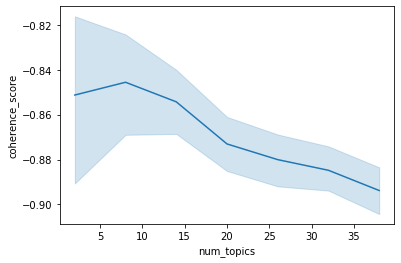

In [125]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [76]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2785
Num Topics = 8  has Coherence Value of 0.3029
Num Topics = 14  has Coherence Value of 0.2887
Num Topics = 20  has Coherence Value of 0.2852
Num Topics = 26  has Coherence Value of 0.2846
Num Topics = 32  has Coherence Value of 0.2914
Num Topics = 38  has Coherence Value of 0.2878


In [89]:
lda[id2word.doc2bow(tokenize("This is a sample document to score with a topic distribution."))]

[(0, 0.02226036),
 (1, 0.022260414),
 (2, 0.022260347),
 (3, 0.022260347),
 (4, 0.022260392),
 (5, 0.0222604),
 (6, 0.022260347),
 (7, 0.35487327),
 (8, 0.022260398),
 (9, 0.022260517),
 (10, 0.022260416),
 (11, 0.022260422),
 (12, 0.3557417),
 (13, 0.022260347),
 (14, 0.022260347)]

## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow

In [78]:
import spacy

nlp = spacy.load('en_core_web_lg')

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/neural/train.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, linear_decay
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable


In [79]:
test = "Ned asked me a question about England today."

In [80]:
doc = nlp(test)

for token in doc:
    print(token.text, token.lemma_, token.pos_)

Ned Ned PROPN
asked ask VERB
me -PRON- PRON
a a DET
question question NOUN
about about ADP
England England PROPN
today today NOUN
. . PUNCT


In [81]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Ned PERSON
England GPE
today DATE


In [82]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            yield text

def get_people(docstream):
    
    ppl = []
    
    for d in docstream:
        
        doc = nlp(d)
        
        for ent in doc.ents:
            
            if ent.label_ == "PERSON":
                ppl.append(ent.lemma_)
                
    return set(ppl)

In [129]:
people = get_people(doc_stream(path))

In [126]:
doc = nlp(next(doc_stream(path)))

In [128]:
doc.ents[0].lemma_

'yesterday'

# Sources

### *References*
* [Andrew Ng et al paper on LDA](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf)
* On [Coherence](https://pdfs.semanticscholar.org/1521/8d9c029cbb903ae7c729b2c644c24994c201.pdf)

### *Resources*

* [Gensim](https://radimrehurek.com/gensim/): Python package for topic modeling, nlp, word vectorization, and few other things. Well maintained and well documented.
* [Topic Modeling with Gensim](http://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling): A kind of cookbook for LDA with gensim. Excellent overview, but the you need to be aware of missing import statements and assumed prior knowledge.
* [Chinese Restuarant Process](https://en.wikipedia.org/wiki/Chinese_restaurant_process): That really obscure stats thing I mentioned... 
* [PyLDAvis](https://github.com/bmabey/pyLDAvis): Library for visualizing the topic model and performing some exploratory work. Works well. Has a direct parrell implementation in R as well. 
* [Rare Technologies](https://rare-technologies.com/): The people that made & maintain gensim and a few other libraries.
* [Jane Austen v. Charlotte Bronte](https://www.literaryladiesguide.com/literary-musings/jane-austen-charlotte-bronte-different-alike/)